In [1]:
import tensorflow as t
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as pt
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import torch
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.optim import lr_scheduler
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import time
import copy
import torch
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
import torch.nn.functional as F


In [2]:
transform = transforms.ToTensor()
Input = pd.read_csv('C:/Data/Time Series/TimeSeries.csv')
Target = pd.read_csv('C:/Data/Image200x200/All cards.csv')

In [3]:
Input_T = Input.T
Target_T = Target.T
X = Input_T.astype('float32')
y = Target_T.astype('float32')


print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#X_train = torch.FloatTensor(X_train)
#X_test = torch.FloatTensor(X_test)
#y_train = torch.FloatTensor(y_train)
#y_test = torch.FloatTensor(y_test)

print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(35, 40000)
(28, 40000)
(7, 40000)
(28, 40000)
(7, 40000)


In [4]:
ArrayTrain_x = np.array(X_train) 
ArrayTrain_y = np.array(y_train) 
ArrayTest_x = np.array(X_test) 
ArrayTest_y  = np.array(y_test)
TensorX_train = torch.FloatTensor(ArrayTrain_x)
Tensory_train = torch.FloatTensor(ArrayTrain_y)
Tensorx_test = torch.FloatTensor(ArrayTest_x)
Tensory_test = torch.FloatTensor(ArrayTest_y)

custom_train = (TensorX_train,Tensory_train) 
custom_test = (Tensorx_test,Tensory_test)


trainloader = DataLoader(custom_train, batch_size=7, shuffle=True)
testloader = DataLoader(custom_test, batch_size=3, shuffle=False)
print (trainloader)
print(TensorX_train.shape)
print(Tensory_train.shape)
print(Tensorx_test.shape)
print(Tensory_test.shape)
print(len(trainloader))

torch.Size([28, 40000])
torch.Size([28, 40000])
torch.Size([7, 40000])
torch.Size([7, 40000])
1


In [5]:
import torch.nn as nn
class MoonsModel(nn.Module):
    def __init__(self, n_features, n_neurons):
        super(MoonsModel, self).__init__()
        self.hidden = nn.Linear(in_features=n_features, out_features=n_neurons)
        self.out_layer = nn.Linear(in_features=n_neurons, out_features=40000)

    def forward(self, X):
        out = F.relu(self.hidden(X))
        out = F.sigmoid(self.out_layer(out))
        return out

In [6]:
model = MoonsModel(n_features=40000, n_neurons=300)
criterion = nn.MSELoss()
loss = 0.0

from torch import optim
optimizer = optim.Adam(model.parameters(), lr = 0.001)   
optimizer


from torch.autograd import Variable
num_epochs = 500
losses = []

def train(num_epochs, model, trainloader):
    
    model.train()
        
    # Train the model
    total_step = len(trainloader)
    print(total_step)
        
    for epoch in range(num_epochs):
        for i, (TensorX_train, Tensory_train) in enumerate(trainloader):
            
            # gives batch data, normalize x when iterate train_loader

            outputs = model(TensorX_train)               
            loss = criterion(outputs, Tensory_train)

            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            losses.append(loss.item())
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 1 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
               

train(num_epochs, model, trainloader)


1


C:\Users\nancy\anaconda3\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1/500], Step [1/1], Loss: 0.2533
Epoch [2/500], Step [1/1], Loss: 0.2349
Epoch [3/500], Step [1/1], Loss: 0.4091
Epoch [4/500], Step [1/1], Loss: 0.3713
Epoch [5/500], Step [1/1], Loss: 0.3318
Epoch [6/500], Step [1/1], Loss: 0.2319
Epoch [7/500], Step [1/1], Loss: 0.2744
Epoch [8/500], Step [1/1], Loss: 0.2397
Epoch [9/500], Step [1/1], Loss: 0.2186
Epoch [10/500], Step [1/1], Loss: 0.1997
Epoch [11/500], Step [1/1], Loss: 0.2244
Epoch [12/500], Step [1/1], Loss: 0.1726
Epoch [13/500], Step [1/1], Loss: 0.2188
Epoch [14/500], Step [1/1], Loss: 0.1520
Epoch [15/500], Step [1/1], Loss: 0.2106
Epoch [16/500], Step [1/1], Loss: 0.2052
Epoch [17/500], Step [1/1], Loss: 0.1353
Epoch [18/500], Step [1/1], Loss: 0.1288
Epoch [19/500], Step [1/1], Loss: 0.1858
Epoch [20/500], Step [1/1], Loss: 0.1174
Epoch [21/500], Step [1/1], Loss: 0.1707
Epoch [22/500], Step [1/1], Loss: 0.1619
Epoch [23/500], Step [1/1], Loss: 0.1065
Epoch [24/500], Step [1/1], Loss: 0.1005
Epoch [25/500], Step [1/1

Epoch [199/500], Step [1/1], Loss: 0.0043
Epoch [200/500], Step [1/1], Loss: 0.0043
Epoch [201/500], Step [1/1], Loss: 0.0397
Epoch [202/500], Step [1/1], Loss: 0.0043
Epoch [203/500], Step [1/1], Loss: 0.0043
Epoch [204/500], Step [1/1], Loss: 0.0396
Epoch [205/500], Step [1/1], Loss: 0.0043
Epoch [206/500], Step [1/1], Loss: 0.0043
Epoch [207/500], Step [1/1], Loss: 0.0396
Epoch [208/500], Step [1/1], Loss: 0.0043
Epoch [209/500], Step [1/1], Loss: 0.0043
Epoch [210/500], Step [1/1], Loss: 0.0043
Epoch [211/500], Step [1/1], Loss: 0.0396
Epoch [212/500], Step [1/1], Loss: 0.0396
Epoch [213/500], Step [1/1], Loss: 0.0396
Epoch [214/500], Step [1/1], Loss: 0.0043
Epoch [215/500], Step [1/1], Loss: 0.0396
Epoch [216/500], Step [1/1], Loss: 0.0396
Epoch [217/500], Step [1/1], Loss: 0.0043
Epoch [218/500], Step [1/1], Loss: 0.0396
Epoch [219/500], Step [1/1], Loss: 0.0396
Epoch [220/500], Step [1/1], Loss: 0.0043
Epoch [221/500], Step [1/1], Loss: 0.0396
Epoch [222/500], Step [1/1], Loss:

Epoch [395/500], Step [1/1], Loss: 0.0391
Epoch [396/500], Step [1/1], Loss: 0.0391
Epoch [397/500], Step [1/1], Loss: 0.0391
Epoch [398/500], Step [1/1], Loss: 0.0042
Epoch [399/500], Step [1/1], Loss: 0.0391
Epoch [400/500], Step [1/1], Loss: 0.0042
Epoch [401/500], Step [1/1], Loss: 0.0042
Epoch [402/500], Step [1/1], Loss: 0.0042
Epoch [403/500], Step [1/1], Loss: 0.0042
Epoch [404/500], Step [1/1], Loss: 0.0391
Epoch [405/500], Step [1/1], Loss: 0.0391
Epoch [406/500], Step [1/1], Loss: 0.0042
Epoch [407/500], Step [1/1], Loss: 0.0042
Epoch [408/500], Step [1/1], Loss: 0.0042
Epoch [409/500], Step [1/1], Loss: 0.0391
Epoch [410/500], Step [1/1], Loss: 0.0042
Epoch [411/500], Step [1/1], Loss: 0.0391
Epoch [412/500], Step [1/1], Loss: 0.0391
Epoch [413/500], Step [1/1], Loss: 0.0391
Epoch [414/500], Step [1/1], Loss: 0.0042
Epoch [415/500], Step [1/1], Loss: 0.0042
Epoch [416/500], Step [1/1], Loss: 0.0391
Epoch [417/500], Step [1/1], Loss: 0.0391
Epoch [418/500], Step [1/1], Loss:

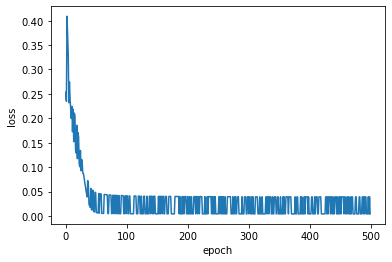

In [7]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
examples = enumerate(testloader)
batch_idx, (Tensorx_test, Tensory_test) = next(examples)
Tensorx_test.shape

torch.Size([7, 40000])

In [9]:
with torch.no_grad():
    correct = 0
    
    for i, (Tensorx_test, Tensory_test) in enumerate (testloader):
        total = 1
        output = model(Tensorx_test)               
        

        correct += torch.mean(Tensory_test - output).clone().detach()
        print(correct)
        if (i+1) % 1 == 0:
            print('Error: {:.4f} '.format(correct / total))
print(len(trainloader))

tensor(0.0046)
Error: 0.0046 
1


In [10]:
with torch.no_grad():
    correct = 0
    
    for i, (Tensorx_test, Tensory_test) in enumerate (testloader):
        total += i
        output = model(Tensorx_test)               
        

        correct += torch.mean(Tensory_test - output).clone().detach()
        

    print('Error:{}'.format(correct / total))
print(len(testloader.dataset))


Error:0.004612521268427372
2


In [11]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
trainloader = torch.rand(1,200,200)
transform = T.ToPILImage()
img = transform(trainloader)
img.show()